# Probability 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Based on these series
- Game of Throne
- West world
- others

### Note
 * Assume the probability sample based on random 500 people 
 * values and example from  www.zstatistics.com, zedstatistics from youtube channle

In [2]:
data = {'Series': ['GOT', 'WestWorld', 'Others'],
        'M': [80, 100, 50],
        'F': [120, 25, 125]}

In [3]:
df = pd.DataFrame(data=data)

In [4]:
df

,Series,M,F
0,GOT,80,120
1,WestWorld,100,25
2,Others,50,125


In [5]:
df['total'] = df[['M', 'F']].sum(axis=1)

In [6]:
df

,Series,M,F,total
0,GOT,80,120,200
1,WestWorld,100,25,125
2,Others,50,125,175


In [7]:
total_male = df['M'].sum(axis=0)
total_female = df['F'].sum(axis=0)
total = df['total'].sum(axis=0)
print(f"\n \
number of male={total_male}\n \
number of female={total_female}\n \
total number of subscribers={total}")


 number of male=230
 number of female=270
 total number of subscribers=500


In [8]:
df = df.append({'Series': 'Total', 'M': total_male, 'F': total_female,'total': total}, ignore_index=True,)

In [9]:
df

,Series,M,F,total
0,GOT,80,120,200
1,WestWorld,100,25,125
2,Others,50,125,175
3,Total,230,270,500


In [10]:
# convert to relative distribution table
df[df.columns[1:]]/500

,M,F,total
0,0.16,0.24,0.40
1,0.20,0.05,0.25
2,0.10,0.25,0.35
3,0.46,0.54,1.00


In [11]:
ndf = df.copy()
ndf[ndf.columns[1:]] = ndf[ndf.columns[1:]]/500

In [12]:
ndf

,Series,M,F,total
0,GOT,0.16,0.24,0.40
1,WestWorld,0.20,0.05,0.25
2,Others,0.10,0.25,0.35
3,Total,0.46,0.54,1.00


# to find following distribution 
- Marginal probability distribution
- joint probabiliyt distribuition

In [13]:
# marginal proability distribution
p_mpd1 = ndf.iloc[3, 1:-1]

In [14]:
p_mpd1

M    0.46
F    0.54
Name: 3, dtype: object

In [15]:
p_mpd2 = ndf['total'][:-1]

In [16]:
p_mpd2

0    0.40
1    0.25
2    0.35
Name: total, dtype: float64

In [17]:
# Joint probability distribution
p_jpd = ndf[['M', 'F']][:-1]

In [18]:
p_jpd

,M,F
0,0.16,0.24
1,0.20,0.05
2,0.10,0.25


In [19]:
# distribution plot
x = ndf['Series'][:-1]
ym = ndf['M'][:-1]
yf = ndf['F'][:-1]

Text(0.5, 1.0, 'Male fav series distribution')

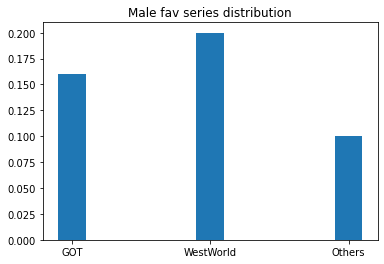

In [20]:
plt.bar(x, ym, width=0.2)
plt.title("Male fav series distribution")

Text(0.5, 1.0, 'Female fav series distribution')

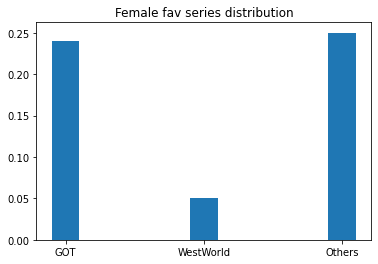

In [21]:
plt.bar(x, yf, width=0.2)
plt.title("Female fav series distribution")

# Conditional probability

## Formula 
$$P(A | B) = \frac{P(A) \cap P(B)}{P(B)}$$

In [22]:
# find the probability of female that chance to 
# be a favourite show is GOT
p_got_given_female = ndf.iloc[0, 2]/ndf.iloc[3, 2]
print(f"probability of female that chance to \
be a favourite show is GOT = {p_got_given_female}")

probability of female that chance to be a favourite show is GOT = 0.4444444444444444


In [23]:
# find the probability of subscriber's favourite show is WestWorld 
# and chance to be a male
p_male_given_westworld = ndf.iloc[1, 1]/ndf.iloc[1, 3]
print(f"probability of subscriber's favourite shows \
is WestWorld and chance to be a male = {p_male_given_westworld}")

probability of subscriber's favourite shows is WestWorld and chance to be a male = 0.8


## Checking dependent events or independent events
(i) $$ P(A|B) = P(A)$$
(ii) $$ P(A \cap B) = P(A) \times P(B) $$

In [24]:
# i
p_got_given_male = ndf.iloc[0, 1]/ndf.iloc[3, 1]
p_got = ndf.iloc[0, 3]
print('independent') if p_got_given_male == p_got else print('not independent')

not independent


In [25]:
# ii
p_westworld_intersect_female = ndf.iloc[1, 2]
p_westworld = ndf.iloc[1, 3]
p_female = ndf.iloc[3, 2]
p_multiply = p_westworld * p_female
print('independent') if p_westworld_intersect_female == p_multiply else print('not independent')

not independent
